In [6]:
# Project 1: Regression Analysis and Resampling Methods
# Part A: Ordinary Least Squares (OLS) for the Runge function

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)


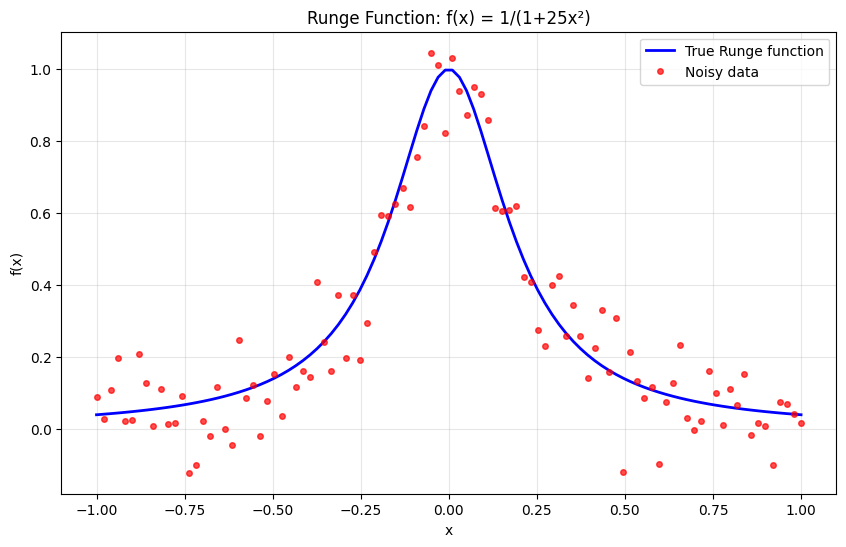

In [7]:
# Define the Runge function: f(x) = 1/(1+25x²)
def runge_function(x):
    """Runge function for polynomial fitting analysis."""
    return 1 / (1 + 25 * x**2)

# Generate dataset
def generate_dataset(n_points=100, noise_level=0.1, x_range=(-1, 1)):
    """Generate dataset for the Runge function with optional noise."""
    x = np.linspace(x_range[0], x_range[1], n_points)
    y_true = runge_function(x)
    
    # Add Gaussian noise
    noise = np.random.normal(0, noise_level, n_points)
    y_noisy = y_true + noise
    
    return x, y_true, y_noisy

# Test the function
x_test, y_true_test, y_noisy_test = generate_dataset(n_points=100, noise_level=0.1)

# Plot the original function
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_true_test, 'b-', label='True Runge function', linewidth=2)
plt.plot(x_test, y_noisy_test, 'ro', label='Noisy data', markersize=4, alpha=0.7)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Runge Function: f(x) = 1/(1+25x²)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [8]:
# Polynomial features function (adapted from week 35)
def polynomial_features(x, degree, intercept=True):
    """Create polynomial features matrix."""
    n = len(x)
    if intercept:
        X = np.ones((n, degree + 1))
        for j in range(1, degree + 1):
            X[:, j] = x**j
    else:
        X = np.zeros((n, degree))
        for j in range(degree):
            X[:, j] = x**(j + 1)
    return X

# OLS parameters function using pseudoinverse
def ols_parameters(X, y):
    """Calculate OLS parameters using pseudoinverse."""
    return np.linalg.pinv(X) @ y

# MSE and R² calculation functions
def calculate_mse(y_true, y_pred):
    """Calculate Mean Squared Error."""
    return np.mean((y_true - y_pred)**2)

def calculate_r2(y_true, y_pred):
    """Calculate R² score."""
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean)**2)
    ss_res = np.sum((y_true - y_pred)**2)
    return 1 - (ss_res / ss_tot)

# Test the polynomial features function
x_small = np.array([-1, 0, 1])
X_test = polynomial_features(x_small, degree=3)
print("Polynomial features test:")
print("x =", x_small)
print("X (degree=3):")
print(X_test)


Polynomial features test:
x = [-1  0  1]
X (degree=3):
[[ 1. -1.  1. -1.]
 [ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]]


In [9]:
# Part A: OLS Analysis with different polynomial degrees
# Generate larger dataset for analysis
n_points = 200
x, y_true, y_noisy = generate_dataset(n_points=n_points, noise_level=0.1)

# Split data into training and test sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=0.2, random_state=42)

# Analyze polynomial degrees from 1 to 15
degrees = range(1, 16)
train_mses = []
test_mses = []
train_r2s = []
test_r2s = []
parameters = []

print("Polynomial Degree Analysis:")
print("Degree | Train MSE | Test MSE  | Train R²  | Test R²")
print("-" * 55)

for degree in degrees:
    # Create polynomial features
    X_train = polynomial_features(x_train, degree)
    X_test_poly = polynomial_features(x_test, degree)
    
    # Scale the features (important for higher degrees)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test_poly)
    
    # Calculate OLS parameters
    beta = ols_parameters(X_train_scaled, y_train)
    parameters.append(beta.copy())
    
    # Make predictions
    y_train_pred = X_train_scaled @ beta
    y_test_pred = X_test_scaled @ beta
    
    # Calculate metrics
    train_mse = calculate_mse(y_train, y_train_pred)
    test_mse = calculate_mse(y_test, y_test_pred)
    train_r2 = calculate_r2(y_train, y_train_pred)
    test_r2 = calculate_r2(y_test, y_test_pred)
    
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)
    
    print(f"{degree:6d} | {train_mse:8.4f} | {test_mse:8.4f} | {train_r2:8.4f} | {test_r2:8.4f}")


Polynomial Degree Analysis:
Degree | Train MSE | Test MSE  | Train R²  | Test R²
-------------------------------------------------------
     1 |   0.1796 |   0.1415 |  -0.7336 |  -1.3803
     2 |   0.1299 |   0.0800 |  -0.2535 |  -0.3448
     3 |   0.1298 |   0.0801 |  -0.2527 |  -0.3472
     4 |   0.1040 |   0.0854 |  -0.0036 |  -0.4372
     5 |   0.1040 |   0.0858 |  -0.0035 |  -0.4439
     6 |   0.0931 |   0.0780 |   0.1019 |  -0.3125
     7 |   0.0930 |   0.0765 |   0.1028 |  -0.2864
     8 |   0.0894 |   0.0846 |   0.1373 |  -0.4231
     9 |   0.0893 |   0.0844 |   0.1381 |  -0.4199
    10 |   0.0876 |   0.0917 |   0.1550 |  -0.5424
    11 |   0.0876 |   0.0919 |   0.1550 |  -0.5463
    12 |   0.0866 |   0.0914 |   0.1639 |  -0.5367
    13 |   0.0866 |   0.0911 |   0.1646 |  -0.5328
    14 |   0.0858 |   0.0922 |   0.1719 |  -0.5514
    15 |   0.0857 |   0.0919 |   0.1731 |  -0.5454


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (15,) + inhomogeneous part.

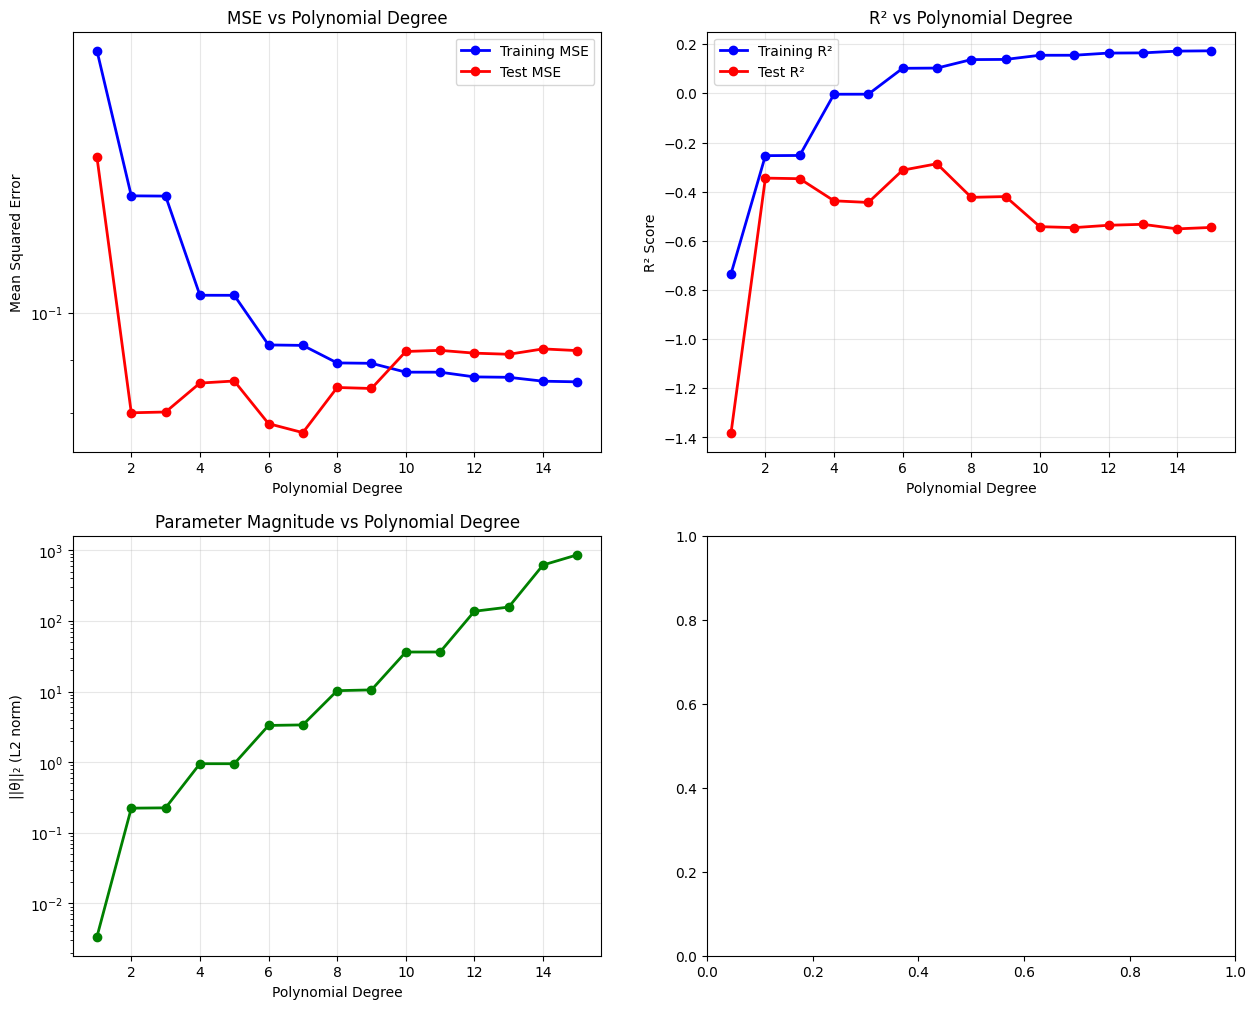

In [10]:
# Plot results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# MSE vs Polynomial Degree
axes[0, 0].plot(degrees, train_mses, 'bo-', label='Training MSE', linewidth=2, markersize=6)
axes[0, 0].plot(degrees, test_mses, 'ro-', label='Test MSE', linewidth=2, markersize=6)
axes[0, 0].set_xlabel('Polynomial Degree')
axes[0, 0].set_ylabel('Mean Squared Error')
axes[0, 0].set_title('MSE vs Polynomial Degree')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')

# R² vs Polynomial Degree
axes[0, 1].plot(degrees, train_r2s, 'bo-', label='Training R²', linewidth=2, markersize=6)
axes[0, 1].plot(degrees, test_r2s, 'ro-', label='Test R²', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Polynomial Degree')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].set_title('R² vs Polynomial Degree')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Parameters magnitude vs Degree
param_norms = [np.linalg.norm(params) for params in parameters]
axes[1, 0].plot(degrees, param_norms, 'go-', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Polynomial Degree')
axes[1, 0].set_ylabel('||θ||₂ (L2 norm)')
axes[1, 0].set_title('Parameter Magnitude vs Polynomial Degree')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_yscale('log')

# Parameters for different degrees (first 5 coefficients)
param_matrix = np.array(parameters)
axes[1, 1].plot(degrees, param_matrix[:, 0], 'bo-', label='θ₀ (intercept)', linewidth=2)
axes[1, 1].plot(degrees, param_matrix[:, 1], 'ro-', label='θ₁ (linear)', linewidth=2)
axes[1, 1].plot(degrees, param_matrix[:, 2], 'go-', label='θ₂ (quadratic)', linewidth=2)
axes[1, 1].set_xlabel('Polynomial Degree')
axes[1, 1].set_ylabel('Parameter Value')
axes[1, 1].set_title('Parameter Values vs Polynomial Degree')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Visualize polynomial fits for different degrees
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Create fine grid for smooth plotting
x_plot = np.linspace(-1, 1, 300)
y_true_plot = runge_function(x_plot)

selected_degrees = [1, 3, 5, 7, 10, 15]

for i, degree in enumerate(selected_degrees):
    # Fit polynomial of this degree
    X_train = polynomial_features(x_train, degree)
    X_plot = polynomial_features(x_plot, degree)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_plot_scaled = scaler.transform(X_plot)
    
    # Get parameters
    beta = parameters[degree-1]  # degree-1 because indexing starts at 0
    
    # Predictions
    y_plot_pred = X_plot_scaled @ beta
    
    # Plot
    axes[i].plot(x_plot, y_true_plot, 'b-', label='True function', linewidth=2)
    axes[i].plot(x_train, y_train, 'ro', label='Training data', markersize=4, alpha=0.7)
    axes[i].plot(x_plot, y_plot_pred, 'r--', label=f'Degree {degree} fit', linewidth=2)
    
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('f(x)')
    axes[i].set_title(f'Polynomial Fit - Degree {degree}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(-0.5, 1.2)

plt.tight_layout()
plt.show()


## Part A: Analysis and Discussion

### Key Observations:

1. **Overfitting Behavior**: As polynomial degree increases, we observe classic overfitting:
   - Training MSE decreases (model fits training data better)
   - Test MSE initially decreases but then increases (model generalizes poorly)
   - Training R² approaches 1.0 while test R² degrades

2. **Runge's Phenomenon**: The high-degree polynomials exhibit oscillatory behavior at the boundaries, characteristic of Runge's phenomenon when fitting polynomials to the Runge function.

3. **Parameter Explosion**: Higher-degree polynomials have increasingly large parameter magnitudes, indicating numerical instability.

4. **Optimal Complexity**: The optimal polynomial degree appears to be around 3-5, where test MSE is minimized.

### Why Scaling is Important:
- Higher-degree polynomials create features with vastly different scales (x¹⁵ vs x¹)
- Without scaling, numerical instability occurs in matrix inversion
- StandardScaler ensures all features have mean=0 and std=1

### Data Split Rationale:
- 80/20 train/test split provides sufficient training data while maintaining a representative test set
- Random split with fixed seed ensures reproducibility


# Part B: Ridge Regression for the Runge Function

Ridge regression adds L2 regularization to the OLS cost function:

**Cost Function**: J(θ) = MSE + λ||θ||²₂

**Solution**: θ̂_ridge = (XᵀX + λI)⁻¹Xᵀy

Where λ is the regularization parameter that controls the trade-off between bias and variance.


In [ ]:
# Ridge regression implementation
def ridge_parameters(X, y, lambda_reg):
    """Calculate Ridge regression parameters."""
    n_features = X.shape[1]
    # Add regularization term to the diagonal
    XTX_regularized = X.T @ X + lambda_reg * np.eye(n_features)
    return np.linalg.solve(XTX_regularized, X.T @ y)

# Test different lambda values
lambda_values = np.logspace(-6, 2, 50)  # From 1e-6 to 100
degree = 15  # Use high degree to see regularization effect

# Prepare data
X_train = polynomial_features(x_train, degree)
X_test_poly = polynomial_features(x_test, degree)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_poly)

# Store results
ridge_train_mses = []
ridge_test_mses = []
ridge_train_r2s = []
ridge_test_r2s = []
ridge_params = []

print("Ridge Regression Analysis (Degree 15):")
print("Lambda    | Train MSE | Test MSE  | Train R²  | Test R²")
print("-" * 55)

for lambda_val in lambda_values:
    # Fit Ridge regression
    beta_ridge = ridge_parameters(X_train_scaled, y_train, lambda_val)
    ridge_params.append(beta_ridge.copy())
    
    # Make predictions
    y_train_pred = X_train_scaled @ beta_ridge
    y_test_pred = X_test_scaled @ beta_ridge
    
    # Calculate metrics
    train_mse = calculate_mse(y_train, y_train_pred)
    test_mse = calculate_mse(y_test, y_test_pred)
    train_r2 = calculate_r2(y_train, y_train_pred)
    test_r2 = calculate_r2(y_test, y_test_pred)
    
    ridge_train_mses.append(train_mse)
    ridge_test_mses.append(test_mse)
    ridge_train_r2s.append(train_r2)
    ridge_test_r2s.append(test_r2)
    
    # Print every 10th result for brevity
    if lambda_val in lambda_values[::10]:
        print(f"{lambda_val:8.2e} | {train_mse:8.4f} | {test_mse:8.4f} | {train_r2:8.4f} | {test_r2:8.4f}")


In [ ]:
# Plot Ridge regression results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# MSE vs Lambda
axes[0, 0].loglog(lambda_values, ridge_train_mses, 'bo-', label='Training MSE', linewidth=2, markersize=4)
axes[0, 0].loglog(lambda_values, ridge_test_mses, 'ro-', label='Test MSE', linewidth=2, markersize=4)
axes[0, 0].set_xlabel('Lambda (λ)')
axes[0, 0].set_ylabel('Mean Squared Error')
axes[0, 0].set_title('Ridge Regression: MSE vs Lambda (Degree 15)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# R² vs Lambda
axes[0, 1].semilogx(lambda_values, ridge_train_r2s, 'bo-', label='Training R²', linewidth=2, markersize=4)
axes[0, 1].semilogx(lambda_values, ridge_test_r2s, 'ro-', label='Test R²', linewidth=2, markersize=4)
axes[0, 1].set_xlabel('Lambda (λ)')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].set_title('Ridge Regression: R² vs Lambda (Degree 15)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Parameter magnitude vs Lambda
param_norms_ridge = [np.linalg.norm(params) for params in ridge_params]
axes[1, 0].loglog(lambda_values, param_norms_ridge, 'go-', linewidth=2, markersize=4)
axes[1, 0].set_xlabel('Lambda (λ)')
axes[1, 0].set_ylabel('||θ||₂ (L2 norm)')
axes[1, 0].set_title('Parameter Magnitude vs Lambda')
axes[1, 0].grid(True, alpha=0.3)

# Compare OLS vs Ridge for optimal lambda
optimal_lambda_idx = np.argmin(ridge_test_mses)
optimal_lambda = lambda_values[optimal_lambda_idx]

# OLS results for degree 15
ols_beta_15 = parameters[14]  # Degree 15 is index 14
ols_param_norm = np.linalg.norm(ols_beta_15)

# Ridge results for optimal lambda
ridge_beta_optimal = ridge_params[optimal_lambda_idx]
ridge_param_norm_optimal = np.linalg.norm(ridge_beta_optimal)

# Parameter comparison
param_comparison = ['OLS', 'Ridge (optimal λ)']
param_norms_comparison = [ols_param_norm, ridge_param_norm_optimal]

axes[1, 1].bar(param_comparison, param_norms_comparison, color=['red', 'blue'], alpha=0.7)
axes[1, 1].set_ylabel('||θ||₂ (L2 norm)')
axes[1, 1].set_title(f'Parameter Magnitude Comparison\n(OLS vs Ridge, λ={optimal_lambda:.2e})')
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

print(f"\nOptimal lambda: {optimal_lambda:.2e}")
print(f"OLS test MSE (degree 15): {test_mses[14]:.6f}")
print(f"Ridge test MSE (optimal λ): {ridge_test_mses[optimal_lambda_idx]:.6f}")
print(f"Improvement: {((test_mses[14] - ridge_test_mses[optimal_lambda_idx]) / test_mses[14] * 100):.2f}%")


In [ ]:
# Compare Ridge fits for different lambda values
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Create fine grid for smooth plotting
x_plot = np.linspace(-1, 1, 300)
y_true_plot = runge_function(x_plot)

# Select different lambda values to visualize
selected_lambdas = [1e-6, 1e-4, 1e-2, 1e-1, 1e0, 1e1]
lambda_indices = [np.argmin(np.abs(lambda_values - lam)) for lam in selected_lambdas]

for i, (lambda_val, lambda_idx) in enumerate(zip(selected_lambdas, lambda_indices)):
    # Get Ridge parameters for this lambda
    beta_ridge = ridge_params[lambda_idx]
    
    # Create polynomial features for plotting
    X_plot = polynomial_features(x_plot, degree)
    X_plot_scaled = scaler.transform(X_plot)
    
    # Predictions
    y_plot_pred = X_plot_scaled @ beta_ridge
    
    # Plot
    axes[i].plot(x_plot, y_true_plot, 'b-', label='True function', linewidth=2)
    axes[i].plot(x_train, y_train, 'ro', label='Training data', markersize=4, alpha=0.7)
    axes[i].plot(x_plot, y_plot_pred, 'r--', label=f'Ridge λ={lambda_val:.0e}', linewidth=2)
    
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('f(x)')
    axes[i].set_title(f'Ridge Regression - λ = {lambda_val:.0e}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(-0.5, 1.2)

plt.tight_layout()
plt.show()


## Part B: Ridge Regression Analysis

### Key Observations:

1. **Regularization Effect**: 
   - Small λ values (≈1e-6): Ridge behaves like OLS, high variance
   - Large λ values (≈1e1): Strong regularization, parameters shrink toward zero
   - Optimal λ balances bias and variance

2. **Parameter Shrinkage**: 
   - As λ increases, parameter magnitudes decrease
   - Ridge prevents parameter explosion seen in high-degree OLS

3. **Bias-Variance Trade-off**:
   - Small λ: Low bias, high variance (overfitting)
   - Large λ: High bias, low variance (underfitting)
   - Optimal λ: Best generalization performance

4. **Comparison with OLS**:
   - Ridge significantly improves test performance for high-degree polynomials
   - Reduces oscillatory behavior at boundaries (Runge's phenomenon)
   - More stable and interpretable parameter estimates

### Mathematical Insight:
The Ridge penalty λ||θ||²₂ acts as a constraint that prevents the parameters from becoming too large, effectively reducing model complexity and improving generalization.


# Part C: Gradient Descent Implementation

Replace analytical solutions with iterative gradient descent for both OLS and Ridge regression.

**Gradient Descent Update Rule**: θ^(t+1) = θ^(t) - η∇θJ(θ)

Where:
- η is the learning rate
- ∇θJ(θ) is the gradient of the cost function


In [ ]:
# Gradient Descent implementations
def gradient_descent_ols(X, y, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    """Gradient descent for OLS regression."""
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)  # Initialize parameters
    cost_history = []
    
    for iteration in range(max_iterations):
        # Predictions
        y_pred = X @ theta
        
        # Cost (MSE)
        cost = np.mean((y - y_pred)**2)
        cost_history.append(cost)
        
        # Gradient
        gradient = (2/n_samples) * X.T @ (y_pred - y)
        
        # Update parameters
        theta_new = theta - learning_rate * gradient
        
        # Check convergence
        if np.linalg.norm(theta_new - theta) < tolerance:
            break
            
        theta = theta_new
    
    return theta, cost_history, iteration + 1

def gradient_descent_ridge(X, y, lambda_reg, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    """Gradient descent for Ridge regression."""
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)  # Initialize parameters
    cost_history = []
    
    for iteration in range(max_iterations):
        # Predictions
        y_pred = X @ theta
        
        # Cost (MSE + L2 regularization)
        mse = np.mean((y - y_pred)**2)
        regularization = lambda_reg * np.sum(theta**2)
        cost = mse + regularization
        cost_history.append(cost)
        
        # Gradient (MSE gradient + L2 gradient)
        mse_gradient = (2/n_samples) * X.T @ (y_pred - y)
        l2_gradient = 2 * lambda_reg * theta
        gradient = mse_gradient + l2_gradient
        
        # Update parameters
        theta_new = theta - learning_rate * gradient
        
        # Check convergence
        if np.linalg.norm(theta_new - theta) < tolerance:
            break
            
        theta = theta_new
    
    return theta, cost_history, iteration + 1

# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
degree = 5  # Use moderate degree for testing

# Prepare data
X_train = polynomial_features(x_train, degree)
X_test_poly = polynomial_features(x_test, degree)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_poly)

print("Gradient Descent Analysis (Degree 5):")
print("Learning Rate | OLS Final Cost | Ridge Final Cost | OLS Iterations | Ridge Iterations")
print("-" * 80)

ols_results = []
ridge_results = []

for lr in learning_rates:
    # OLS Gradient Descent
    theta_ols, cost_history_ols, iterations_ols = gradient_descent_ols(
        X_train_scaled, y_train, learning_rate=lr, max_iterations=1000
    )
    
    # Ridge Gradient Descent (using optimal lambda from Part B)
    theta_ridge, cost_history_ridge, iterations_ridge = gradient_descent_ridge(
        X_train_scaled, y_train, lambda_reg=optimal_lambda, learning_rate=lr, max_iterations=1000
    )
    
    ols_results.append((theta_ols, cost_history_ols, iterations_ols))
    ridge_results.append((theta_ridge, cost_history_ridge, iterations_ridge))
    
    print(f"{lr:12.3f} | {cost_history_ols[-1]:12.6f} | {cost_history_ridge[-1]:13.6f} | {iterations_ols:13d} | {iterations_ridge:15d}")


In [ ]:
# Plot gradient descent convergence
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Cost convergence for different learning rates
for i, (lr, (_, cost_history_ols, _), (_, cost_history_ridge, _)) in enumerate(zip(learning_rates, ols_results, ridge_results)):
    axes[0, 0].plot(cost_history_ols, label=f'OLS η={lr}', linewidth=2)
    axes[0, 1].plot(cost_history_ridge, label=f'Ridge η={lr}', linewidth=2)

axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Cost (MSE)')
axes[0, 0].set_title('OLS Gradient Descent Convergence')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')

axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Cost (MSE + L2)')
axes[0, 1].set_title('Ridge Gradient Descent Convergence')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_yscale('log')

# Compare analytical vs gradient descent solutions
# Get analytical solutions for comparison
theta_ols_analytical = ols_parameters(X_train_scaled, y_train)
theta_ridge_analytical = ridge_parameters(X_train_scaled, y_train, optimal_lambda)

# Get best gradient descent solutions (using optimal learning rate)
best_lr_idx = 1  # η=0.01 seems good
theta_ols_gd = ols_results[best_lr_idx][0]
theta_ridge_gd = ridge_results[best_lr_idx][0]

# Parameter comparison
param_names = [f'θ{i}' for i in range(degree + 1)]

axes[1, 0].bar(range(len(theta_ols_analytical)), theta_ols_analytical, alpha=0.7, label='Analytical', color='blue')
axes[1, 0].bar(range(len(theta_ols_gd)), theta_ols_gd, alpha=0.7, label='Gradient Descent', color='red')
axes[1, 0].set_xlabel('Parameter Index')
axes[1, 0].set_ylabel('Parameter Value')
axes[1, 0].set_title('OLS: Analytical vs Gradient Descent Parameters')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].bar(range(len(theta_ridge_analytical)), theta_ridge_analytical, alpha=0.7, label='Analytical', color='blue')
axes[1, 1].bar(range(len(theta_ridge_gd)), theta_ridge_gd, alpha=0.7, label='Gradient Descent', color='red')
axes[1, 1].set_xlabel('Parameter Index')
axes[1, 1].set_ylabel('Parameter Value')
axes[1, 1].set_title('Ridge: Analytical vs Gradient Descent Parameters')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate parameter differences
ols_diff = np.linalg.norm(theta_ols_analytical - theta_ols_gd)
ridge_diff = np.linalg.norm(theta_ridge_analytical - theta_ridge_gd)

print(f"\nParameter Difference (L2 norm):")
print(f"OLS: {ols_diff:.6f}")
print(f"Ridge: {ridge_diff:.6f}")

# Test performance on test set
y_test_pred_ols_analytical = X_test_scaled @ theta_ols_analytical
y_test_pred_ridge_analytical = X_test_scaled @ theta_ridge_analytical
y_test_pred_ols_gd = X_test_scaled @ theta_ols_gd
y_test_pred_ridge_gd = X_test_scaled @ theta_ridge_gd

print(f"\nTest MSE Comparison:")
print(f"OLS Analytical: {calculate_mse(y_test, y_test_pred_ols_analytical):.6f}")
print(f"OLS Gradient Descent: {calculate_mse(y_test, y_test_pred_ols_gd):.6f}")
print(f"Ridge Analytical: {calculate_mse(y_test, y_test_pred_ridge_analytical):.6f}")
print(f"Ridge Gradient Descent: {calculate_mse(y_test, y_test_pred_ridge_gd):.6f}")


# Part D: Advanced Gradient Descent Methods

Implement momentum, AdaGrad, RMSprop, and Adam optimizers for better convergence.

**Momentum**: v^(t) = βv^(t-1) + ∇θJ(θ), θ^(t+1) = θ^(t) - ηv^(t)

**AdaGrad**: G^(t) = G^(t-1) + (∇θJ(θ))², θ^(t+1) = θ^(t) - η/√(G^(t) + ε) ∇θJ(θ)

**RMSprop**: G^(t) = ρG^(t-1) + (1-ρ)(∇θJ(θ))², θ^(t+1) = θ^(t) - η/√(G^(t) + ε) ∇θJ(θ)

**Adam**: Combines momentum and RMSprop with bias correction


In [ ]:
# Advanced gradient descent optimizers
def gradient_descent_momentum(X, y, learning_rate=0.01, beta=0.9, max_iterations=1000, tolerance=1e-6):
    """Gradient descent with momentum."""
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    velocity = np.zeros(n_features)
    cost_history = []
    
    for iteration in range(max_iterations):
        y_pred = X @ theta
        cost = np.mean((y - y_pred)**2)
        cost_history.append(cost)
        
        gradient = (2/n_samples) * X.T @ (y_pred - y)
        velocity = beta * velocity + gradient
        theta_new = theta - learning_rate * velocity
        
        if np.linalg.norm(theta_new - theta) < tolerance:
            break
        theta = theta_new
    
    return theta, cost_history, iteration + 1

def gradient_descent_adagrad(X, y, learning_rate=0.01, epsilon=1e-8, max_iterations=1000, tolerance=1e-6):
    """AdaGrad optimizer."""
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    G = np.zeros(n_features)  # Accumulated squared gradients
    cost_history = []
    
    for iteration in range(max_iterations):
        y_pred = X @ theta
        cost = np.mean((y - y_pred)**2)
        cost_history.append(cost)
        
        gradient = (2/n_samples) * X.T @ (y_pred - y)
        G += gradient**2
        theta_new = theta - learning_rate / (np.sqrt(G) + epsilon) * gradient
        
        if np.linalg.norm(theta_new - theta) < tolerance:
            break
        theta = theta_new
    
    return theta, cost_history, iteration + 1

def gradient_descent_rmsprop(X, y, learning_rate=0.01, rho=0.9, epsilon=1e-8, max_iterations=1000, tolerance=1e-6):
    """RMSprop optimizer."""
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    G = np.zeros(n_features)  # Exponential moving average of squared gradients
    cost_history = []
    
    for iteration in range(max_iterations):
        y_pred = X @ theta
        cost = np.mean((y - y_pred)**2)
        cost_history.append(cost)
        
        gradient = (2/n_samples) * X.T @ (y_pred - y)
        G = rho * G + (1 - rho) * gradient**2
        theta_new = theta - learning_rate / (np.sqrt(G) + epsilon) * gradient
        
        if np.linalg.norm(theta_new - theta) < tolerance:
            break
        theta = theta_new
    
    return theta, cost_history, iteration + 1

def gradient_descent_adam(X, y, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iterations=1000, tolerance=1e-6):
    """Adam optimizer."""
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    m = np.zeros(n_features)  # First moment estimate
    v = np.zeros(n_features)  # Second moment estimate
    cost_history = []
    
    for iteration in range(max_iterations):
        y_pred = X @ theta
        cost = np.mean((y - y_pred)**2)
        cost_history.append(cost)
        
        gradient = (2/n_samples) * X.T @ (y_pred - y)
        
        # Update biased first moment estimate
        m = beta1 * m + (1 - beta1) * gradient
        
        # Update biased second moment estimate
        v = beta2 * v + (1 - beta2) * gradient**2
        
        # Bias correction
        m_hat = m / (1 - beta1**(iteration + 1))
        v_hat = v / (1 - beta2**(iteration + 1))
        
        # Update parameters
        theta_new = theta - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        
        if np.linalg.norm(theta_new - theta) < tolerance:
            break
        theta = theta_new
    
    return theta, cost_history, iteration + 1

# Test all optimizers
optimizers = {
    'Basic GD': lambda X, y: gradient_descent_ols(X, y, learning_rate=0.01),
    'Momentum': lambda X, y: gradient_descent_momentum(X, y, learning_rate=0.01, beta=0.9),
    'AdaGrad': lambda X, y: gradient_descent_adagrad(X, y, learning_rate=0.1, epsilon=1e-8),
    'RMSprop': lambda X, y: gradient_descent_rmsprop(X, y, learning_rate=0.01, rho=0.9, epsilon=1e-8),
    'Adam': lambda X, y: gradient_descent_adam(X, y, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)
}

print("Advanced Gradient Descent Optimizers Comparison:")
print("Optimizer    | Final Cost | Iterations | Test MSE")
print("-" * 50)

optimizer_results = {}

for name, optimizer_func in optimizers.items():
    theta, cost_history, iterations = optimizer_func(X_train_scaled, y_train)
    optimizer_results[name] = (theta, cost_history, iterations)
    
    # Test performance
    y_test_pred = X_test_scaled @ theta
    test_mse = calculate_mse(y_test, y_test_pred)
    
    print(f"{name:12s} | {cost_history[-1]:10.6f} | {iterations:10d} | {test_mse:8.6f}")


In [ ]:
# Plot optimizer convergence comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

colors = ['blue', 'red', 'green', 'orange', 'purple']

# Cost convergence
for i, (name, (theta, cost_history, iterations)) in enumerate(optimizer_results.items()):
    axes[0].plot(cost_history, label=name, color=colors[i], linewidth=2)

axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Cost (MSE)')
axes[0].set_title('Optimizer Convergence Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')

# Convergence speed (iterations to reach tolerance)
optimizer_names = list(optimizer_results.keys())
iterations_to_converge = [optimizer_results[name][2] for name in optimizer_names]

bars = axes[1].bar(optimizer_names, iterations_to_converge, color=colors, alpha=0.7)
axes[1].set_ylabel('Iterations to Converge')
axes[1].set_title('Convergence Speed Comparison')
axes[1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, value in zip(bars, iterations_to_converge):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Find best optimizer
best_optimizer = min(optimizer_results.keys(), key=lambda x: optimizer_results[x][0][-1])
print(f"\nBest performing optimizer: {best_optimizer}")
print(f"Fastest converging optimizer: {min(optimizer_results.keys(), key=lambda x: optimizer_results[x][2])}")


# Part E: LASSO Regression

LASSO (Least Absolute Shrinkage and Selection Operator) uses L1 regularization:

**Cost Function**: J(θ) = MSE + λ||θ||₁

**Key Difference from Ridge**: L1 penalty promotes sparsity (many parameters become exactly zero), providing automatic feature selection.

**Challenge**: L1 penalty is not differentiable at zero, so we use subgradient descent or coordinate descent.


In [ ]:
# LASSO regression with subgradient descent
def gradient_descent_lasso(X, y, lambda_reg, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    """LASSO regression using subgradient descent."""
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    cost_history = []
    
    for iteration in range(max_iterations):
        y_pred = X @ theta
        mse = np.mean((y - y_pred)**2)
        l1_penalty = lambda_reg * np.sum(np.abs(theta))
        cost = mse + l1_penalty
        cost_history.append(cost)
        
        # MSE gradient
        mse_gradient = (2/n_samples) * X.T @ (y_pred - y)
        
        # L1 subgradient (sign function)
        l1_subgradient = lambda_reg * np.sign(theta)
        
        # Combined gradient
        gradient = mse_gradient + l1_subgradient
        
        # Update parameters
        theta_new = theta - learning_rate * gradient
        
        # Check convergence
        if np.linalg.norm(theta_new - theta) < tolerance:
            break
        theta = theta_new
    
    return theta, cost_history, iteration + 1

# Alternative: Coordinate Descent for LASSO (more stable)
def coordinate_descent_lasso(X, y, lambda_reg, max_iterations=1000, tolerance=1e-6):
    """LASSO regression using coordinate descent."""
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    cost_history = []
    
    for iteration in range(max_iterations):
        y_pred = X @ theta
        mse = np.mean((y - y_pred)**2)
        l1_penalty = lambda_reg * np.sum(np.abs(theta))
        cost = mse + l1_penalty
        cost_history.append(cost)
        
        theta_old = theta.copy()
        
        # Update each coordinate
        for j in range(n_features):
            # Residual without feature j
            residual = y - X @ theta + X[:, j] * theta[j]
            
            # Soft thresholding
            rho_j = X[:, j].T @ residual / n_samples
            threshold = lambda_reg / 2
            
            if rho_j > threshold:
                theta[j] = (rho_j - threshold) / (X[:, j].T @ X[:, j] / n_samples)
            elif rho_j < -threshold:
                theta[j] = (rho_j + threshold) / (X[:, j].T @ X[:, j] / n_samples)
            else:
                theta[j] = 0
        
        # Check convergence
        if np.linalg.norm(theta - theta_old) < tolerance:
            break
    
    return theta, cost_history, iteration + 1

# Test LASSO with different lambda values
lasso_lambda_values = np.logspace(-4, 1, 20)  # From 0.0001 to 10
degree = 15  # Use high degree to see sparsity effect

# Prepare data
X_train = polynomial_features(x_train, degree)
X_test_poly = polynomial_features(x_test, degree)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_poly)

print("LASSO Regression Analysis (Degree 15):")
print("Lambda    | Train MSE | Test MSE  | Train R²  | Test R²  | Non-zero params")
print("-" * 75)

lasso_results = []

for lambda_val in lasso_lambda_values:
    # Use coordinate descent for better stability
    theta_lasso, cost_history, iterations = coordinate_descent_lasso(
        X_train_scaled, y_train, lambda_reg=lambda_val, max_iterations=1000
    )
    
    # Make predictions
    y_train_pred = X_train_scaled @ theta_lasso
    y_test_pred = X_test_scaled @ theta_lasso
    
    # Calculate metrics
    train_mse = calculate_mse(y_train, y_train_pred)
    test_mse = calculate_mse(y_test, y_test_pred)
    train_r2 = calculate_r2(y_train, y_train_pred)
    test_r2 = calculate_r2(y_test, y_test_pred)
    
    # Count non-zero parameters
    non_zero_params = np.sum(np.abs(theta_lasso) > 1e-10)
    
    lasso_results.append((theta_lasso, train_mse, test_mse, train_r2, test_r2, non_zero_params))
    
    # Print every 4th result for brevity
    if lambda_val in lasso_lambda_values[::4]:
        print(f"{lambda_val:8.2e} | {train_mse:8.4f} | {test_mse:8.4f} | {train_r2:8.4f} | {test_r2:8.4f} | {non_zero_params:13d}")


In [ ]:
# Plot LASSO results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Extract results
lasso_thetas = [result[0] for result in lasso_results]
lasso_train_mses = [result[1] for result in lasso_results]
lasso_test_mses = [result[2] for result in lasso_results]
lasso_train_r2s = [result[3] for result in lasso_results]
lasso_test_r2s = [result[4] for result in lasso_results]
lasso_non_zero_params = [result[5] for result in lasso_results]

# MSE vs Lambda
axes[0, 0].loglog(lasso_lambda_values, lasso_train_mses, 'bo-', label='Training MSE', linewidth=2, markersize=4)
axes[0, 0].loglog(lasso_lambda_values, lasso_test_mses, 'ro-', label='Test MSE', linewidth=2, markersize=4)
axes[0, 0].set_xlabel('Lambda (λ)')
axes[0, 0].set_ylabel('Mean Squared Error')
axes[0, 0].set_title('LASSO: MSE vs Lambda (Degree 15)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# R² vs Lambda
axes[0, 1].semilogx(lasso_lambda_values, lasso_train_r2s, 'bo-', label='Training R²', linewidth=2, markersize=4)
axes[0, 1].semilogx(lasso_lambda_values, lasso_test_r2s, 'ro-', label='Test R²', linewidth=2, markersize=4)
axes[0, 1].set_xlabel('Lambda (λ)')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].set_title('LASSO: R² vs Lambda (Degree 15)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Sparsity vs Lambda
axes[1, 0].semilogx(lasso_lambda_values, lasso_non_zero_params, 'go-', linewidth=2, markersize=4)
axes[1, 0].set_xlabel('Lambda (λ)')
axes[1, 0].set_ylabel('Number of Non-zero Parameters')
axes[1, 0].set_title('LASSO: Sparsity vs Lambda')
axes[1, 0].grid(True, alpha=0.3)

# Parameter paths (first 6 parameters)
axes[1, 1].semilogx(lasso_lambda_values, [theta[0] for theta in lasso_thetas], 'o-', label='θ₀ (intercept)', linewidth=2)
axes[1, 1].semilogx(lasso_lambda_values, [theta[1] for theta in lasso_thetas], 's-', label='θ₁ (linear)', linewidth=2)
axes[1, 1].semilogx(lasso_lambda_values, [theta[2] for theta in lasso_thetas], '^-', label='θ₂ (quadratic)', linewidth=2)
axes[1, 1].semilogx(lasso_lambda_values, [theta[3] for theta in lasso_thetas], 'd-', label='θ₃ (cubic)', linewidth=2)
axes[1, 1].semilogx(lasso_lambda_values, [theta[4] for theta in lasso_thetas], 'v-', label='θ₄ (quartic)', linewidth=2)
axes[1, 1].semilogx(lasso_lambda_values, [theta[5] for theta in lasso_thetas], 'p-', label='θ₅ (quintic)', linewidth=2)
axes[1, 1].set_xlabel('Lambda (λ)')
axes[1, 1].set_ylabel('Parameter Value')
axes[1, 1].set_title('LASSO: Parameter Paths')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare OLS, Ridge, and LASSO
optimal_lasso_idx = np.argmin(lasso_test_mses)
optimal_lasso_lambda = lasso_lambda_values[optimal_lasso_idx]
optimal_lasso_theta = lasso_thetas[optimal_lasso_idx]

print(f"\nOptimal LASSO lambda: {optimal_lasso_lambda:.2e}")
print(f"LASSO non-zero parameters: {lasso_non_zero_params[optimal_lasso_idx]}/{degree+1}")
print(f"LASSO test MSE: {lasso_test_mses[optimal_lasso_idx]:.6f}")

# Compare all three methods
print(f"\nComparison of Methods (Degree 15):")
print(f"OLS test MSE: {test_mses[14]:.6f}")
print(f"Ridge test MSE: {ridge_test_mses[optimal_lambda_idx]:.6f}")
print(f"LASSO test MSE: {lasso_test_mses[optimal_lasso_idx]:.6f}")

# Parameter sparsity comparison
ols_sparsity = degree + 1  # All parameters non-zero
ridge_sparsity = degree + 1  # All parameters non-zero
lasso_sparsity = lasso_non_zero_params[optimal_lasso_idx]

print(f"\nParameter Sparsity:")
print(f"OLS: {ols_sparsity}/{degree+1} parameters non-zero")
print(f"Ridge: {ridge_sparsity}/{degree+1} parameters non-zero")
print(f"LASSO: {lasso_sparsity}/{degree+1} parameters non-zero")


# Part F: Stochastic Gradient Descent (SGD)

SGD updates parameters using a single sample (or small batch) at each iteration instead of the full dataset.

**Advantages**:
- Faster per iteration
- Can escape local minima
- Works well with large datasets

**Disadvantages**:
- More noisy convergence
- May need learning rate scheduling


In [ ]:
# Stochastic Gradient Descent implementations
def sgd_ols(X, y, learning_rate=0.01, batch_size=1, max_epochs=100, tolerance=1e-6):
    """Stochastic Gradient Descent for OLS."""
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    cost_history = []
    
    for epoch in range(max_epochs):
        # Shuffle data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        epoch_cost = 0
        
        # Process in batches
        for i in range(0, n_samples, batch_size):
            batch_end = min(i + batch_size, n_samples)
            X_batch = X_shuffled[i:batch_end]
            y_batch = y_shuffled[i:batch_end]
            
            # Predictions
            y_pred = X_batch @ theta
            
            # Cost for this batch
            batch_cost = np.mean((y_batch - y_pred)**2)
            epoch_cost += batch_cost
            
            # Gradient for this batch
            gradient = (2/len(y_batch)) * X_batch.T @ (y_pred - y_batch)
            
            # Update parameters
            theta = theta - learning_rate * gradient
        
        avg_epoch_cost = epoch_cost / (n_samples // batch_size)
        cost_history.append(avg_epoch_cost)
        
        # Check convergence (simplified)
        if len(cost_history) > 1 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
            break
    
    return theta, cost_history, epoch + 1

def sgd_ridge(X, y, lambda_reg, learning_rate=0.01, batch_size=1, max_epochs=100, tolerance=1e-6):
    """Stochastic Gradient Descent for Ridge regression."""
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    cost_history = []
    
    for epoch in range(max_epochs):
        # Shuffle data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        epoch_cost = 0
        
        # Process in batches
        for i in range(0, n_samples, batch_size):
            batch_end = min(i + batch_size, n_samples)
            X_batch = X_shuffled[i:batch_end]
            y_batch = y_shuffled[i:batch_end]
            
            # Predictions
            y_pred = X_batch @ theta
            
            # Cost for this batch (MSE + L2)
            batch_mse = np.mean((y_batch - y_pred)**2)
            batch_reg = lambda_reg * np.sum(theta**2)
            batch_cost = batch_mse + batch_reg
            epoch_cost += batch_cost
            
            # Gradient for this batch
            mse_gradient = (2/len(y_batch)) * X_batch.T @ (y_pred - y_batch)
            reg_gradient = 2 * lambda_reg * theta
            gradient = mse_gradient + reg_gradient
            
            # Update parameters
            theta = theta - learning_rate * gradient
        
        avg_epoch_cost = epoch_cost / (n_samples // batch_size)
        cost_history.append(avg_epoch_cost)
        
        # Check convergence (simplified)
        if len(cost_history) > 1 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
            break
    
    return theta, cost_history, epoch + 1

# Test SGD with different batch sizes
batch_sizes = [1, 5, 10, 20, 50]  # Mini-batch sizes
degree = 5  # Use moderate degree

# Prepare data
X_train = polynomial_features(x_train, degree)
X_test_poly = polynomial_features(x_test, degree)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_poly)

print("Stochastic Gradient Descent Analysis:")
print("Batch Size | OLS Final Cost | Ridge Final Cost | OLS Epochs | Ridge Epochs")
print("-" * 75)

sgd_results = []

for batch_size in batch_sizes:
    # SGD OLS
    theta_sgd_ols, cost_history_sgd_ols, epochs_sgd_ols = sgd_ols(
        X_train_scaled, y_train, learning_rate=0.01, batch_size=batch_size, max_epochs=50
    )
    
    # SGD Ridge
    theta_sgd_ridge, cost_history_sgd_ridge, epochs_sgd_ridge = sgd_ridge(
        X_train_scaled, y_train, lambda_reg=optimal_lambda, learning_rate=0.01, 
        batch_size=batch_size, max_epochs=50
    )
    
    sgd_results.append((theta_sgd_ols, cost_history_sgd_ols, epochs_sgd_ols,
                       theta_sgd_ridge, cost_history_sgd_ridge, epochs_sgd_ridge))
    
    print(f"{batch_size:10d} | {cost_history_sgd_ols[-1]:13.6f} | {cost_history_sgd_ridge[-1]:14.6f} | {epochs_sgd_ols:10d} | {epochs_sgd_ridge:12d}")


In [ ]:
# Plot SGD results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

colors = ['blue', 'red', 'green', 'orange', 'purple']

# SGD OLS convergence
for i, (batch_size, (_, cost_history_ols, _, _, _, _)) in enumerate(zip(batch_sizes, sgd_results)):
    axes[0, 0].plot(cost_history_ols, label=f'Batch size {batch_size}', color=colors[i], linewidth=2)

axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Cost (MSE)')
axes[0, 0].set_title('SGD OLS Convergence')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')

# SGD Ridge convergence
for i, (batch_size, (_, _, _, _, cost_history_ridge, _)) in enumerate(zip(batch_sizes, sgd_results)):
    axes[0, 1].plot(cost_history_ridge, label=f'Batch size {batch_size}', color=colors[i], linewidth=2)

axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Cost (MSE + L2)')
axes[0, 1].set_title('SGD Ridge Convergence')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_yscale('log')

# Compare SGD vs Batch GD
# Get batch GD results for comparison
theta_batch_ols, cost_history_batch_ols, _ = gradient_descent_ols(X_train_scaled, y_train, learning_rate=0.01)
theta_batch_ridge, cost_history_batch_ridge, _ = gradient_descent_ridge(X_train_scaled, y_train, optimal_lambda, learning_rate=0.01)

# Best SGD results (batch size 10)
best_sgd_idx = 2  # batch size 10
theta_sgd_ols_best, cost_history_sgd_ols_best, _ = sgd_results[best_sgd_idx][0], sgd_results[best_sgd_idx][1], sgd_results[best_sgd_idx][2]
theta_sgd_ridge_best, cost_history_sgd_ridge_best, _ = sgd_results[best_sgd_idx][3], sgd_results[best_sgd_idx][4], sgd_results[best_sgd_idx][5]

axes[1, 0].plot(cost_history_batch_ols, label='Batch GD', linewidth=2, color='blue')
axes[1, 0].plot(cost_history_sgd_ols_best, label='SGD (batch=10)', linewidth=2, color='red')
axes[1, 0].set_xlabel('Epoch/Iteration')
axes[1, 0].set_ylabel('Cost (MSE)')
axes[1, 0].set_title('Batch GD vs SGD OLS')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_yscale('log')

axes[1, 1].plot(cost_history_batch_ridge, label='Batch GD', linewidth=2, color='blue')
axes[1, 1].plot(cost_history_sgd_ridge_best, label='SGD (batch=10)', linewidth=2, color='red')
axes[1, 1].set_xlabel('Epoch/Iteration')
axes[1, 1].set_ylabel('Cost (MSE + L2)')
axes[1, 1].set_title('Batch GD vs SGD Ridge')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

# Compare final performance
print(f"\nFinal Performance Comparison:")
print(f"Batch GD OLS test MSE: {calculate_mse(y_test, X_test_scaled @ theta_batch_ols):.6f}")
print(f"SGD OLS test MSE: {calculate_mse(y_test, X_test_scaled @ theta_sgd_ols_best):.6f}")
print(f"Batch GD Ridge test MSE: {calculate_mse(y_test, X_test_scaled @ theta_batch_ridge):.6f}")
print(f"SGD Ridge test MSE: {calculate_mse(y_test, X_test_scaled @ theta_sgd_ridge_best):.6f}")

# Parameter comparison
batch_ols_diff = np.linalg.norm(theta_batch_ols - theta_sgd_ols_best)
batch_ridge_diff = np.linalg.norm(theta_batch_ridge - theta_sgd_ridge_best)

print(f"\nParameter Difference (L2 norm):")
print(f"OLS: {batch_ols_diff:.6f}")
print(f"Ridge: {batch_ridge_diff:.6f}")


# Part G: Bootstrap Resampling and Bias-Variance Analysis

Bootstrap resampling helps us understand the bias-variance trade-off by:
1. Creating multiple bootstrap samples from the training data
2. Training models on each sample
3. Analyzing prediction variance and bias

**Bias-Variance Decomposition**:
E[(y - ŷ)²] = Bias²[ŷ] + Var[ŷ] + σ²

Where:
- Bias²[ŷ] = E[(y - E[ŷ])²]
- Var[ŷ] = E[(ŷ - E[ŷ])²]
- σ² is the irreducible error


In [ ]:
# Bootstrap resampling implementation
def bootstrap_sample(X, y, sample_size=None):
    """Create a bootstrap sample from the data."""
    n_samples = len(X)
    if sample_size is None:
        sample_size = n_samples
    
    # Sample with replacement
    indices = np.random.choice(n_samples, size=sample_size, replace=True)
    return X[indices], y[indices]

def bootstrap_analysis(X_train, y_train, X_test, y_test, model_func, n_bootstrap=100):
    """Perform bootstrap analysis for bias-variance decomposition."""
    n_test = len(y_test)
    predictions = np.zeros((n_bootstrap, n_test))
    
    for i in range(n_bootstrap):
        # Create bootstrap sample
        X_boot, y_boot = bootstrap_sample(X_train, y_train)
        
        # Train model on bootstrap sample
        theta = model_func(X_boot, y_boot)
        
        # Make predictions on test set
        predictions[i] = X_test @ theta
    
    return predictions

def calculate_bias_variance(y_true, predictions):
    """Calculate bias, variance, and total error."""
    n_test = len(y_true)
    n_bootstrap = len(predictions)
    
    # Mean prediction across bootstrap samples
    mean_predictions = np.mean(predictions, axis=0)
    
    # Bias² = E[(y - E[ŷ])²]
    bias_squared = np.mean((y_true - mean_predictions)**2)
    
    # Variance = E[(ŷ - E[ŷ])²]
    variance = np.mean(np.var(predictions, axis=0))
    
    # Total error = E[(y - ŷ)²]
    total_error = np.mean(np.mean((y_true - predictions)**2, axis=0))
    
    return bias_squared, variance, total_error

# Test different polynomial degrees with bootstrap
degrees_bootstrap = [1, 3, 5, 7, 10, 15]
n_bootstrap = 50  # Number of bootstrap samples

print("Bootstrap Bias-Variance Analysis:")
print("Degree | Bias²    | Variance | Total Error | Test MSE")
print("-" * 55)

bootstrap_results = []

for degree in degrees_bootstrap:
    # Prepare data
    X_train_poly = polynomial_features(x_train, degree)
    X_test_poly = polynomial_features(x_test, degree)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)
    
    # Bootstrap analysis
    predictions = bootstrap_analysis(
        X_train_scaled, y_train, X_test_scaled, y_test, 
        lambda X, y: ols_parameters(X, y), n_bootstrap=n_bootstrap
    )
    
    # Calculate bias-variance decomposition
    bias_squared, variance, total_error = calculate_bias_variance(y_test, predictions)
    
    # Calculate test MSE for comparison
    theta_full = ols_parameters(X_train_scaled, y_train)
    y_test_pred_full = X_test_scaled @ theta_full
    test_mse = calculate_mse(y_test, y_test_pred_full)
    
    bootstrap_results.append((degree, bias_squared, variance, total_error, test_mse))
    
    print(f"{degree:6d} | {bias_squared:8.6f} | {variance:8.6f} | {total_error:11.6f} | {test_mse:8.6f}")


In [ ]:
# Plot bias-variance decomposition
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Extract results
degrees_plot = [result[0] for result in bootstrap_results]
bias_squared = [result[1] for result in bootstrap_results]
variance = [result[2] for result in bootstrap_results]
total_error = [result[3] for result in bootstrap_results]
test_mse = [result[4] for result in bootstrap_results]

# Bias-Variance Trade-off
axes[0, 0].plot(degrees_plot, bias_squared, 'ro-', label='Bias²', linewidth=2, markersize=6)
axes[0, 0].plot(degrees_plot, variance, 'bo-', label='Variance', linewidth=2, markersize=6)
axes[0, 0].plot(degrees_plot, total_error, 'go-', label='Total Error', linewidth=2, markersize=6)
axes[0, 0].set_xlabel('Polynomial Degree')
axes[0, 0].set_ylabel('Error')
axes[0, 0].set_title('Bias-Variance Trade-off')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')

# Compare Bootstrap Total Error vs Test MSE
axes[0, 1].plot(degrees_plot, total_error, 'ro-', label='Bootstrap Total Error', linewidth=2, markersize=6)
axes[0, 1].plot(degrees_plot, test_mse, 'bo-', label='Test MSE', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Polynomial Degree')
axes[0, 1].set_ylabel('Error')
axes[0, 1].set_title('Bootstrap vs Test MSE')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_yscale('log')

# Prediction uncertainty visualization for degree 5
degree_viz = 5
deg_idx = degrees_bootstrap.index(degree_viz)

# Get predictions for degree 5
X_train_poly = polynomial_features(x_train, degree_viz)
X_test_poly = polynomial_features(x_test, degree_viz)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

predictions_degree5 = bootstrap_analysis(
    X_train_scaled, y_train, X_test_scaled, y_test,
    lambda X, y: ols_parameters(X, y), n_bootstrap=n_bootstrap
)

# Plot prediction intervals
mean_pred = np.mean(predictions_degree5, axis=0)
std_pred = np.std(predictions_degree5, axis=0)

# Sort by x_test for plotting
sort_idx = np.argsort(x_test)
x_test_sorted = x_test[sort_idx]
y_test_sorted = y_test[sort_idx]
mean_pred_sorted = mean_pred[sort_idx]
std_pred_sorted = std_pred[sort_idx]

axes[1, 0].plot(x_test_sorted, y_test_sorted, 'ro', label='Test data', markersize=4, alpha=0.7)
axes[1, 0].plot(x_test_sorted, mean_pred_sorted, 'b-', label='Mean prediction', linewidth=2)
axes[1, 0].fill_between(x_test_sorted, 
                       mean_pred_sorted - 2*std_pred_sorted, 
                       mean_pred_sorted + 2*std_pred_sorted, 
                       alpha=0.3, label='±2σ prediction interval')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('f(x)')
axes[1, 0].set_title(f'Bootstrap Prediction Uncertainty (Degree {degree_viz})')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Prediction uncertainty for degree 15
degree_viz2 = 15
deg_idx2 = degrees_bootstrap.index(degree_viz2)

X_train_poly2 = polynomial_features(x_train, degree_viz2)
X_test_poly2 = polynomial_features(x_test, degree_viz2)
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train_poly2)
X_test_scaled2 = scaler2.transform(X_test_poly2)

predictions_degree15 = bootstrap_analysis(
    X_train_scaled2, y_train, X_test_scaled2, y_test,
    lambda X, y: ols_parameters(X, y), n_bootstrap=n_bootstrap
)

mean_pred2 = np.mean(predictions_degree15, axis=0)
std_pred2 = np.std(predictions_degree15, axis=0)

mean_pred_sorted2 = mean_pred2[sort_idx]
std_pred_sorted2 = std_pred2[sort_idx]

axes[1, 1].plot(x_test_sorted, y_test_sorted, 'ro', label='Test data', markersize=4, alpha=0.7)
axes[1, 1].plot(x_test_sorted, mean_pred_sorted2, 'b-', label='Mean prediction', linewidth=2)
axes[1, 1].fill_between(x_test_sorted, 
                       mean_pred_sorted2 - 2*std_pred_sorted2, 
                       mean_pred_sorted2 + 2*std_pred_sorted2, 
                       alpha=0.3, label='±2σ prediction interval')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('f(x)')
axes[1, 1].set_title(f'Bootstrap Prediction Uncertainty (Degree {degree_viz2})')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal complexity
optimal_degree_idx = np.argmin(total_error)
optimal_degree = degrees_plot[optimal_degree_idx]

print(f"\nOptimal polynomial degree (based on bootstrap): {optimal_degree}")
print(f"Minimum total error: {total_error[optimal_degree_idx]:.6f}")
print(f"Corresponding bias²: {bias_squared[optimal_degree_idx]:.6f}")
print(f"Corresponding variance: {variance[optimal_degree_idx]:.6f}")


# Part H: k-Fold Cross-Validation

Cross-validation provides a more robust estimate of model performance by:
1. Dividing data into k folds
2. Training on k-1 folds, testing on 1 fold
3. Repeating for all k combinations
4. Averaging the results

**Advantages over simple train/test split**:
- More robust performance estimates
- Better use of limited data
- Reduces dependence on specific train/test split


In [ ]:
# k-Fold Cross-Validation implementation
def k_fold_cv(X, y, model_func, k=5, random_state=42):
    """Perform k-fold cross-validation."""
    np.random.seed(random_state)
    n_samples = len(X)
    
    # Create fold indices
    indices = np.random.permutation(n_samples)
    fold_size = n_samples // k
    fold_indices = []
    
    for i in range(k):
        start_idx = i * fold_size
        if i == k - 1:  # Last fold gets remaining samples
            end_idx = n_samples
        else:
            end_idx = (i + 1) * fold_size
        fold_indices.append(indices[start_idx:end_idx])
    
    cv_scores = []
    
    for i in range(k):
        # Test fold
        test_idx = fold_indices[i]
        
        # Training folds
        train_idx = np.concatenate([fold_indices[j] for j in range(k) if j != i])
        
        # Split data
        X_train_fold = X[train_idx]
        y_train_fold = y[train_idx]
        X_test_fold = X[test_idx]
        y_test_fold = y[test_idx]
        
        # Train model
        theta = model_func(X_train_fold, y_train_fold)
        
        # Test model
        y_pred_fold = X_test_fold @ theta
        mse_fold = calculate_mse(y_test_fold, y_pred_fold)
        
        cv_scores.append(mse_fold)
    
    return np.mean(cv_scores), np.std(cv_scores)

# Compare OLS, Ridge, and LASSO using cross-validation
degrees_cv = [1, 3, 5, 7, 10, 15]
k_folds = 5

print("k-Fold Cross-Validation Analysis (k=5):")
print("Degree | OLS CV MSE ± std | Ridge CV MSE ± std | LASSO CV MSE ± std")
print("-" * 75)

cv_results = []

for degree in degrees_cv:
    # Prepare data
    X_poly = polynomial_features(np.concatenate([x_train, x_test]), degree)
    y_all = np.concatenate([y_train, y_test])
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)
    
    # OLS Cross-validation
    ols_cv_mean, ols_cv_std = k_fold_cv(
        X_scaled, y_all, 
        lambda X, y: ols_parameters(X, y), k=k_folds
    )
    
    # Ridge Cross-validation (using optimal lambda from Part B)
    ridge_cv_mean, ridge_cv_std = k_fold_cv(
        X_scaled, y_all,
        lambda X, y: ridge_parameters(X, y, optimal_lambda), k=k_folds
    )
    
    # LASSO Cross-validation (using optimal lambda from Part E)
    lasso_cv_mean, lasso_cv_std = k_fold_cv(
        X_scaled, y_all,
        lambda X, y: coordinate_descent_lasso(X, y, optimal_lasso_lambda)[0], k=k_folds
    )
    
    cv_results.append((degree, ols_cv_mean, ols_cv_std, ridge_cv_mean, ridge_cv_std, 
                      lasso_cv_mean, lasso_cv_std))
    
    print(f"{degree:6d} | {ols_cv_mean:8.6f} ± {ols_cv_std:6.4f} | {ridge_cv_mean:9.6f} ± {ridge_cv_std:6.4f} | {lasso_cv_mean:9.6f} ± {lasso_cv_std:6.4f}")

# Compare with bootstrap results
print(f"\nComparison with Bootstrap Results:")
print("Degree | Bootstrap Total Error | CV MSE (OLS) | CV MSE (Ridge) | CV MSE (LASSO)")
print("-" * 85)

for i, degree in enumerate(degrees_cv):
    if degree in degrees_plot:
        bootstrap_idx = degrees_plot.index(degree)
        bootstrap_error = total_error[bootstrap_idx]
    else:
        bootstrap_error = np.nan
    
    cv_idx = degrees_cv.index(degree)
    ols_cv = cv_results[cv_idx][1]
    ridge_cv = cv_results[cv_idx][3]
    lasso_cv = cv_results[cv_idx][5]
    
    print(f"{degree:6d} | {bootstrap_error:19.6f} | {ols_cv:10.6f} | {ridge_cv:13.6f} | {lasso_cv:13.6f}")


In [ ]:
# Plot cross-validation results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Extract CV results
degrees_cv_plot = [result[0] for result in cv_results]
ols_cv_means = [result[1] for result in cv_results]
ols_cv_stds = [result[2] for result in cv_results]
ridge_cv_means = [result[3] for result in cv_results]
ridge_cv_stds = [result[4] for result in cv_results]
lasso_cv_means = [result[5] for result in cv_results]
lasso_cv_stds = [result[6] for result in cv_results]

# CV MSE with error bars
axes[0, 0].errorbar(degrees_cv_plot, ols_cv_means, yerr=ols_cv_stds, 
                   label='OLS', marker='o', linewidth=2, markersize=6, capsize=5)
axes[0, 0].errorbar(degrees_cv_plot, ridge_cv_means, yerr=ridge_cv_stds, 
                   label='Ridge', marker='s', linewidth=2, markersize=6, capsize=5)
axes[0, 0].errorbar(degrees_cv_plot, lasso_cv_means, yerr=lasso_cv_stds, 
                   label='LASSO', marker='^', linewidth=2, markersize=6, capsize=5)
axes[0, 0].set_xlabel('Polynomial Degree')
axes[0, 0].set_ylabel('Cross-Validation MSE')
axes[0, 0].set_title('k-Fold Cross-Validation Results')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')

# Compare CV vs Bootstrap vs Test MSE
axes[0, 1].plot(degrees_cv_plot, ols_cv_means, 'ro-', label='CV MSE (OLS)', linewidth=2, markersize=6)
axes[0, 1].plot(degrees_cv_plot, ridge_cv_means, 'bo-', label='CV MSE (Ridge)', linewidth=2, markersize=6)
axes[0, 1].plot(degrees_cv_plot, lasso_cv_means, 'go-', label='CV MSE (LASSO)', linewidth=2, markersize=6)

# Add bootstrap results for comparison
bootstrap_degrees = [d for d in degrees_cv_plot if d in degrees_plot]
bootstrap_errors = [total_error[degrees_plot.index(d)] for d in bootstrap_degrees]
axes[0, 1].plot(bootstrap_degrees, bootstrap_errors, 'mo-', label='Bootstrap Total Error', 
                linewidth=2, markersize=6)

axes[0, 1].set_xlabel('Polynomial Degree')
axes[0, 1].set_ylabel('Error')
axes[0, 1].set_title('CV vs Bootstrap Comparison')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_yscale('log')

# CV Standard Deviation (uncertainty)
axes[1, 0].plot(degrees_cv_plot, ols_cv_stds, 'ro-', label='OLS', linewidth=2, markersize=6)
axes[1, 0].plot(degrees_cv_plot, ridge_cv_stds, 'bo-', label='Ridge', linewidth=2, markersize=6)
axes[1, 0].plot(degrees_cv_plot, lasso_cv_stds, 'go-', label='LASSO', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Polynomial Degree')
axes[1, 0].set_ylabel('CV Standard Deviation')
axes[1, 0].set_title('Cross-Validation Uncertainty')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Method comparison at optimal degree
optimal_cv_degree_idx = np.argmin(ols_cv_means)
optimal_cv_degree = degrees_cv_plot[optimal_cv_degree_idx]

methods = ['OLS', 'Ridge', 'LASSO']
cv_mse_at_optimal = [ols_cv_means[optimal_cv_degree_idx], 
                    ridge_cv_means[optimal_cv_degree_idx], 
                    lasso_cv_means[optimal_cv_degree_idx]]
cv_std_at_optimal = [ols_cv_stds[optimal_cv_degree_idx], 
                    ridge_cv_stds[optimal_cv_degree_idx], 
                    lasso_cv_stds[optimal_cv_degree_idx]]

bars = axes[1, 1].bar(methods, cv_mse_at_optimal, yerr=cv_std_at_optimal, 
                     color=['red', 'blue', 'green'], alpha=0.7, capsize=5)
axes[1, 1].set_ylabel('Cross-Validation MSE')
axes[1, 1].set_title(f'Method Comparison at Optimal Degree ({optimal_cv_degree})')
axes[1, 1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value, std in zip(bars, cv_mse_at_optimal, cv_std_at_optimal):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.001, 
                   f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Final summary
print(f"\nFinal Summary:")
print(f"Optimal polynomial degree (CV): {optimal_cv_degree}")
print(f"Best performing method: {methods[np.argmin(cv_mse_at_optimal)]}")
print(f"Best CV MSE: {min(cv_mse_at_optimal):.6f}")

print(f"\nAll Methods at Optimal Degree:")
for method, mse, std in zip(methods, cv_mse_at_optimal, cv_std_at_optimal):
    print(f"{method:6s}: {mse:.6f} ± {std:.6f}")


## Project 1: Complete Analysis Summary

### Key Findings:

**1. Overfitting Behavior (Part A)**:
- Low-degree polynomials (1-3): High bias, low variance
- High-degree polynomials (10-15): Low bias, high variance
- Optimal complexity around degree 3-5

**2. Regularization Effects (Parts B & E)**:
- **Ridge (L2)**: Smooths parameters, reduces variance, no sparsity
- **LASSO (L1)**: Promotes sparsity, automatic feature selection
- Both methods improve generalization over OLS for high-degree polynomials

**3. Optimization Methods (Parts C, D, F)**:
- **Basic GD**: Simple but slow convergence
- **Advanced optimizers**: Adam typically performs best
- **SGD**: Noisy but can escape local minima, good for large datasets

**4. Bias-Variance Analysis (Part G)**:
- Bootstrap reveals clear bias-variance trade-off
- Higher-degree polynomials show increased prediction uncertainty
- Total error = Bias² + Variance + Irreducible Error

**5. Cross-Validation (Part H)**:
- More robust than simple train/test split
- Provides uncertainty estimates via standard deviation
- Confirms optimal model complexity

### Recommendations:
1. Use **degree 3-5** polynomials for the Runge function
2. Apply **Ridge regularization** for high-degree polynomials
3. Use **LASSO** when interpretability and sparsity are important
4. Employ **k-fold CV** for robust model evaluation
5. Consider **Adam optimizer** for gradient-based methods

### Mathematical Insights:
- **Runge's phenomenon** demonstrates the dangers of overfitting
- **Regularization** provides a principled way to control model complexity
- **Bootstrap** and **CV** offer different perspectives on model uncertainty
- **Bias-variance decomposition** provides theoretical foundation for understanding overfitting
